# EDA

Relationship date and Value

In [13]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import datetime as dt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter


In [14]:
# Right after importing seaborn (could also use 'whitegrid')
sns.set_theme(style='whitegrid', context='talk')

# surpress scientific notation
pd.options.display.float_format = '{:.3f}'.format

In [15]:
data = pd.read_csv('data/data_full_clean.csv', index_col = 0)
# set period to datetime
data['Period'] = pd.to_datetime(data['Period'])

In [16]:
data

,Period,Commodity,Province,Country,State,Value,Quantity_kg,cpi_val,Value-adjusted
0,2017-05-01,"1605.30.10 - lobster, prepared or preserved, f...",Newfoundland and Labrador,United States,Massachusetts,2454203,42059,102.169,3023516.549
1,2017-05-01,"1605.30.10 - lobster, prepared or preserved, f...",New Brunswick,United States,Massachusetts,20137016,370393,102.169,24808298.708
2,2017-05-01,"1605.30.90 - lobster, prepared or preserved, nes",Prince Edward Island,United States,California,31113,1633,102.169,38330.436
3,2017-05-01,"1605.30.10 - lobster, prepared or preserved, f...",Quebec,United States,California,98603,2347,102.169,121476.423
4,2017-05-01,"1605.30.90 - lobster, prepared or preserved, nes",Prince Edward Island,United States,New Hampshire,310914,15676,102.169,383038.251
...,...,...,...,...,...,...,...,...,...
57380,1989-02-01,"0306.22.10 - lobsters, (homarus spp), live (te...",British Columbia,Hong Kong,NaN,81553,4538,59.652,172082.303
57381,1989-02-01,"0306.12.10 - lobsters in brine, (homarus spp),...",Prince Edward Island,Sweden,NaN,107235,8340,59.652,226273.047
57382,1989-02-01,"0306.22.90 - lobsters,(homarus spp), not froze...",Nova Scotia,United States,Massachusetts,16048,1316,59.652,33862.357
57383,1989-02-01,"0306.22.10 - lobsters, (homarus spp), live (te...",Nova Scotia,United States,Unknown states,124924,8381,59.652,263598.024


In [17]:
data.dtypes

Period            datetime64[ns]
Commodity                 object
Province                  object
Country                   object
State                     object
Value                      int64
Quantity_kg                int64
cpi_val                  float64
Value-adjusted           float64
dtype: object

In [18]:
data.describe()

,Period,Value,Quantity_kg,cpi_val,Value-adjusted
count,57385,57385.000,57385.000,57385.000,57385.000
mean,2006-12-23 05:15:34.676308992,735823.135,33274.091,88.013,990292.229
min,1988-01-01 00:00:00,1.000,0.000,56.929,1.112
25%,1998-05-01 00:00:00,23085.000,1229.000,73.584,34538.684
50%,2007-08-01 00:00:00,115482.000,6667.000,88.477,172880.993
75%,2015-11-01 00:00:00,467480.000,23498.000,100.327,663401.275
max,2023-09-01 00:00:00,84597758.000,3371254.000,126.029,95881525.289
std,NaN,2598970.962,112322.227,16.078,3250745.610


In [19]:
data['Province'].value_counts()

Province
Nova Scotia                  25585
New Brunswick                13524
Prince Edward Island          9952
Quebec                        3359
British Columbia              1726
Newfoundland and Labrador     1543
Ontario                       1504
Northwest Territories           70
Alberta                         53
Manitoba                        34
Saskatchewan                    25
Nunavut                         10
Name: count, dtype: int64

In [20]:
data['Country'].value_counts()

Country
United States                        27364
France                                2527
Japan                                 2245
Hong Kong                             1841
Belgium                               1828
                                     ...  
Oman                                     1
Congo, Democratic Republic of the        1
Mauritius                                1
Tanzania, United Republic of             1
Slovenia                                 1
Name: count, Length: 160, dtype: int64

In [21]:
data[data['Period'].dt.year > 2000]

,Period,Commodity,Province,Country,State,Value,Quantity_kg,cpi_val,Value-adjusted
0,2017-05-01,"1605.30.10 - lobster, prepared or preserved, f...",Newfoundland and Labrador,United States,Massachusetts,2454203,42059,102.169,3023516.549
1,2017-05-01,"1605.30.10 - lobster, prepared or preserved, f...",New Brunswick,United States,Massachusetts,20137016,370393,102.169,24808298.708
2,2017-05-01,"1605.30.90 - lobster, prepared or preserved, nes",Prince Edward Island,United States,California,31113,1633,102.169,38330.436
3,2017-05-01,"1605.30.10 - lobster, prepared or preserved, f...",Quebec,United States,California,98603,2347,102.169,121476.423
4,2017-05-01,"1605.30.90 - lobster, prepared or preserved, nes",Prince Edward Island,United States,New Hampshire,310914,15676,102.169,383038.251
...,...,...,...,...,...,...,...,...,...
57210,2001-04-01,"0306.22.10 - lobsters, (homarus spp), live (te...",Nova Scotia,United States,Texas,257857,10211,78.788,411942.280
57211,2001-04-01,"0306.22.10 - lobsters, (homarus spp), live (te...",Nova Scotia,United States,Washington,5244,231,78.788,8377.610
57212,2001-04-01,"0306.22.10 - lobsters, (homarus spp), live (te...",Nova Scotia,Norway,NaN,31596,1536,78.788,50476.537
57213,2001-04-01,"0306.22.10 - lobsters, (homarus spp), live (te...",Quebec,United States,Connecticut,298496,15785,78.788,476865.561


In [22]:
data.dtypes

Period            datetime64[ns]
Commodity                 object
Province                  object
Country                   object
State                     object
Value                      int64
Quantity_kg                int64
cpi_val                  float64
Value-adjusted           float64
dtype: object

In [23]:
x_values = data.loc[data['Period'].dt.year > 2010,'Period']
type(x_values)

pandas.core.series.Series

(array([14610., 15340., 16071., 16801., 17532., 18262., 18993., 19723.]),
 [Text(14610.0, 0, '2010-01-01'),
  Text(15340.0, 0, '2012-01-01'),
  Text(16071.0, 0, '2014-01-01'),
  Text(16801.0, 0, '2016-01-01'),
  Text(17532.0, 0, '2018-01-01'),
  Text(18262.0, 0, '2020-01-01'),
  Text(18993.0, 0, '2022-01-01'),
  Text(19723.0, 0, '2024-01-01')])

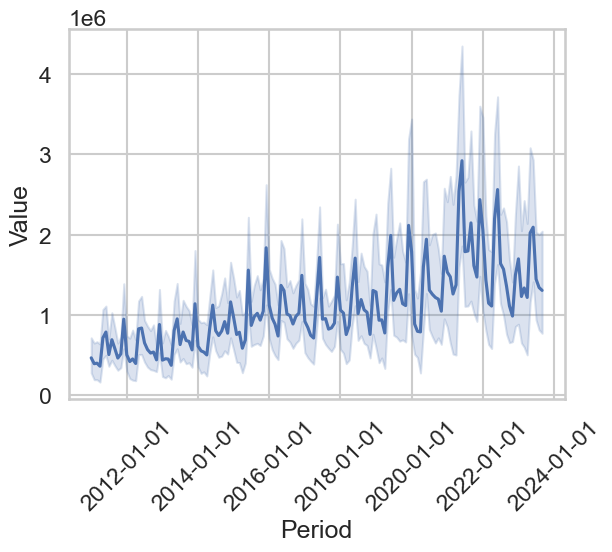

In [33]:
ax = sns.lineplot(data = data, x=x_values, y=data['Value'])

# Format the x-axis labels as dates
date_format = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)

(array([14610., 15340., 16071., 16801., 17532., 18262., 18993., 19723.]),
 [Text(14610.0, 0, '2010-01-01'),
  Text(15340.0, 0, '2012-01-01'),
  Text(16071.0, 0, '2014-01-01'),
  Text(16801.0, 0, '2016-01-01'),
  Text(17532.0, 0, '2018-01-01'),
  Text(18262.0, 0, '2020-01-01'),
  Text(18993.0, 0, '2022-01-01'),
  Text(19723.0, 0, '2024-01-01')])

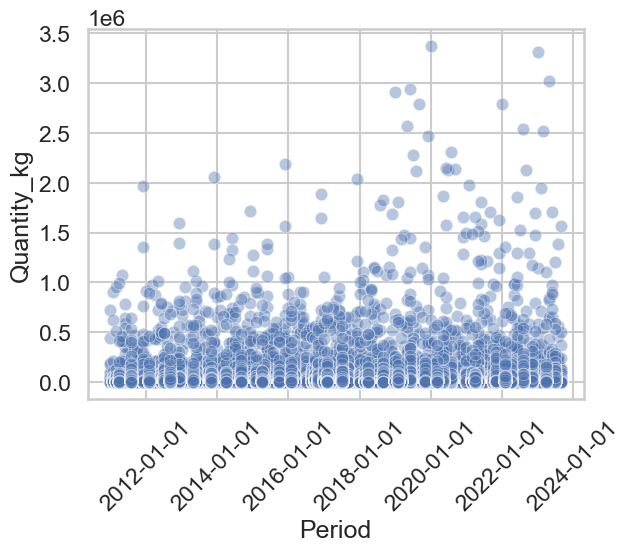

In [34]:
ax = sns.scatterplot(data = data, x=x_values, y=data['Quantity_kg'], alpha=0.4)

# Format the x-axis labels as dates
date_format = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)

In [35]:
data

,Period,Commodity,Province,Country,State,Value,Quantity_kg,cpi_val,Value-adjusted
0,2017-05-01,"1605.30.10 - lobster, prepared or preserved, f...",Newfoundland and Labrador,United States,Massachusetts,2454203,42059,102.169,3023516.549
1,2017-05-01,"1605.30.10 - lobster, prepared or preserved, f...",New Brunswick,United States,Massachusetts,20137016,370393,102.169,24808298.708
2,2017-05-01,"1605.30.90 - lobster, prepared or preserved, nes",Prince Edward Island,United States,California,31113,1633,102.169,38330.436
3,2017-05-01,"1605.30.10 - lobster, prepared or preserved, f...",Quebec,United States,California,98603,2347,102.169,121476.423
4,2017-05-01,"1605.30.90 - lobster, prepared or preserved, nes",Prince Edward Island,United States,New Hampshire,310914,15676,102.169,383038.251
...,...,...,...,...,...,...,...,...,...
57380,1989-02-01,"0306.22.10 - lobsters, (homarus spp), live (te...",British Columbia,Hong Kong,NaN,81553,4538,59.652,172082.303
57381,1989-02-01,"0306.12.10 - lobsters in brine, (homarus spp),...",Prince Edward Island,Sweden,NaN,107235,8340,59.652,226273.047
57382,1989-02-01,"0306.22.90 - lobsters,(homarus spp), not froze...",Nova Scotia,United States,Massachusetts,16048,1316,59.652,33862.357
57383,1989-02-01,"0306.22.10 - lobsters, (homarus spp), live (te...",Nova Scotia,United States,Unknown states,124924,8381,59.652,263598.024


In [38]:
annual_data = data.drop(columns = ['Province', 'Country', 'State'])
annual_data['Year'] = data['Period'].dt.year
annual_data = annual_data.groupby(['Commodity', 'Year'], as_index=False).agg({'Value': 'sum', 'Quantity_kg': 'sum'}).reset_index(drop=True)

# annual_data = annual_data.sort_values('Value_$', ascending = False).reset_index(drop=True)
annual_data

,Commodity,Year,Value,Quantity_kg
0,"0306.11.00 - rock lobster & o sea crawfish,frz...",2012,2149954,197718
1,"0306.11.00 - rock lobster & o sea crawfish,frz...",2013,1697035,136571
2,"0306.11.00 - rock lobster & o sea crawfish,frz...",2014,3448411,267140
3,"0306.11.00 - rock lobster & o sea crawfish,frz...",2015,6291135,401061
4,"0306.11.00 - rock lobster & o sea crawfish,frz...",2016,1959146,91588
...,...,...,...,...
354,"1605.30.99 - lobster, prepared or preserved, o...",2012,3821464,764314
355,"1605.30.99 - lobster, prepared or preserved, o...",2013,3728414,698505
356,"1605.30.99 - lobster, prepared or preserved, o...",2014,3916409,747611
357,"1605.30.99 - lobster, prepared or preserved, o...",2015,8495287,932522


In [39]:
annual_data.dtypes

Commodity      object
Year            int32
Value           int64
Quantity_kg     int64
dtype: object

In [40]:
annual_data_22 = annual_data.copy()

In [51]:
def top_commodities_annual(df_name, year):
    annual_data = df_name.drop(columns = ['Province', 'Country', 'State'])
    annual_data['Year'] = annual_data['Period'].dt.year
    annual_data = annual_data.groupby(['Year', 'Commodity'], as_index=False).agg({'Value': 'sum', 'Quantity_kg': 'sum'}).reset_index(drop=True)
    annual_data = annual_data[annual_data['Year'] == year].reset_index(drop = True)
    # annual total for that year to divide each commodity by 
    annual_total = data.loc[data['Period'].dt.year == year,'Value_$'].sum()
    # print('annual_total - year: ', year, '\namount:', annual_total)
    annual_data['Value_percent'] = annual_data['Value_$']/annual_total
    annual_data.sort_values(by=['Value_$', 'Year'], ascending = False, inplace=True)
    return annual_data
    



In [52]:
a = top_commodities_annual(data, 2020)[['Commodity','Value_percent']]
a

KeyError: 'Value_$'

In [32]:
b = top_commodities_annual(data, 2021)[['Commodity','Value_percent']]
b

KeyError: "['Unit of measure'] not found in axis"

In [43]:
merged_df = pd.merge(a, b, on='Commodity')
merged_df

NameError: name 'a' is not defined

In [44]:
# get list of years from DF:
years_list =  list(set(data['Period'].dt.year.unique()))
years_list[:3]

[1988, 1989, 1990]

In [45]:
commoditites_list = data['Commodity'].unique()
len(commoditites_list)

31

In [46]:
len(years_list)

36

In [47]:
merged_df = pd.DataFrame(columns = ['Commodity'],data = commoditites_list)
# merged_df = pd.DataFrame()
for year in years_list:
    # print(year)
    year_df = top_commodities_annual(data, year)[['Commodity','Value_percent']]
    year_df.rename(columns = {'Value_percent': year}, inplace = True)
    # print(year_df)
    # join merged df and percents based on commodity balue 
    merged_df = pd.merge(merged_df, year_df, on = 'Commodity', how='outer')
    # print(merged_df)
merged_df

KeyError: "['Unit of measure'] not found in axis"

In [ ]:
data[data['Commodity'].str.contains('0306.22')]['Value_$']

In [ ]:
# drop rows where all values are nan
merged_df.dropna(how = 'all', axis = 0, ignore_index = True, inplace = True)


In [ ]:
# merged_df.groupby('Commodity').mean(axis = 1)

c = merged_df.iloc[:,1:].mean(axis=1) > 0.01


In [ ]:
import plotly.express as px

In [ ]:
import plotly.express as px


fig = px.bar(annual_data, x="Year", y="Value_$", color='Commodity', title="Total Sales by Commodity by year")
fig.show()

In [ ]:
fig = px.bar(annual_data[annual_data['Year'] > 2018], x="Year", y="Value_$", color='Commodity', title="Total Sales by Commodity by year")
fig.show()